In [1]:
import numpy as np
import os
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier
import matplotlib.pyplot as plt

def visualize_classifier(clf, X, y):
    min_x, max_x = X[:, 0].min() -1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() -1.0, X[:, 1].max() + 1.0    
    mesh_step_size = 0.01
    x_vals, y_vals = np.meshgrid(np.arange(min_x, 
                                           max_x, 
                                           mesh_step_size),
                                 np.arange(min_y,
                                           max_y,
                                           mesh_step_size))
    output = clf.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    output = output.reshape(x_vals.shape)
    plt.figure()
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)
    plt.scatter(X[:, 0], 
                X[:, 1], 
                c=y, 
                s=75, 
                edgecolors='black', 
                linewidth=1,
                cmap=plt.cm.Paired)
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())
    plt.show()

# Logisitic Regression

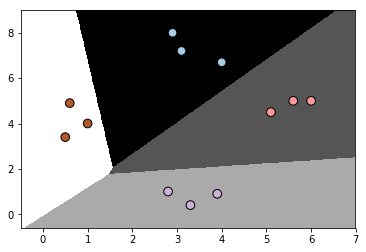

In [30]:
X = np.array([[3.1, 7.2],
              [  4, 6.7],
              [2.9,   8],
              [5.1, 4.5],
              [  6,   5],
              [5.6,   5],
              [3.3, 0.4],
              [3.9, 0.9],
              [2.8,   1],
              [0.5, 3.4],
              [  1,   4],
              [0.6, 4.9]])
y = np.array([0,0,0,1,1,1,2,2,2,3,3,3])

classifier = LogisticRegression(solver='liblinear', C=1)
classifier.fit(X, y)

visualize_classifier(classifier, X, y)

# Naive Bayes

In [31]:
input_file = "data_multivar_nb.txt"

data = np.loadtxt(input_file, delimiter=",")
X, y = data[:, :-1], data[:, -1]

In [32]:
clf = GaussianNB()
clf.fit(X, y)

GaussianNB(priors=None)

99.75


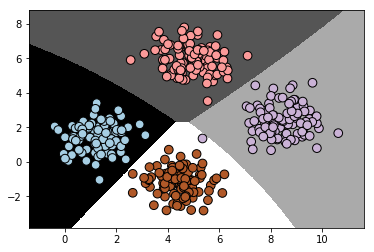

In [33]:
y_pred = clf.predict(X)

acc = 100.0 * (y == y_pred).sum() / X.shape[0]
print acc
visualize_classifier(clf, X, y)

This accuracy isn't really robust because we are calculating against the train. Let's split the data into train and test sets and see how it performs then!

In [34]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)
clf_new = GaussianNB()
clf_new.fit(X_tr, y_tr)
y_te_pred = clf_new.predict(X_te)

100.0


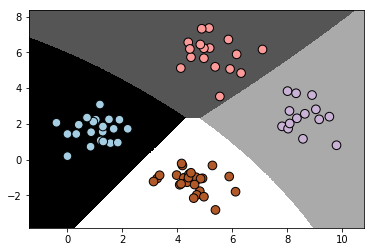

In [35]:
acc = 100.0 * (y_te == y_te_pred).sum() / X_te.shape[0]
print acc
visualize_classifier(clf, X_te, y_te)

In [36]:
num_folds = 5
acc = cross_val_score(clf_new, X, y, scoring='accuracy', cv=num_folds)
pre = cross_val_score(clf_new, X, y, scoring='precision_weighted', cv=num_folds)
rec = cross_val_score(clf_new, X, y, scoring='recall_weighted', cv=num_folds)
fos = cross_val_score(clf_new, X, y, scoring='f1_weighted', cv=num_folds)

print "Accuracy: ", acc.mean()
print "Precision: ", pre.mean()
print "Recall: ", rec.mean()
print "F1 Score", fos.mean()

Accuracy:  0.9974999999999999
Precision:  0.9976190476190476
Recall:  0.9974999999999999
F1 Score 0.9974984365228268


# Confusion Matrix

In [37]:
# Define Sample Labels!
true = [2, 0, 0, 2, 4, 4, 1, 0, 3, 3, 3]
pred = [2, 1, 0, 2, 4, 3, 1, 0, 1, 3, 3]

# Create confusion matrix
conf_mat = confusion_matrix(true, pred)

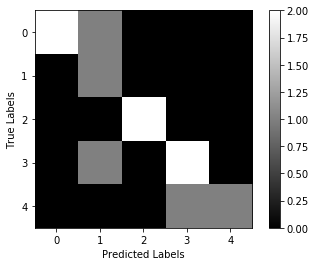

In [38]:
# Visualize
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.gray)
plt.colorbar()
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [39]:
targets = ['Class-'+str(i) for i in xrange(5)]
print '\n', classification_report(true, pred, target_names=targets)


             precision    recall  f1-score   support

    Class-0       1.00      0.67      0.80         3
    Class-1       0.33      1.00      0.50         1
    Class-2       1.00      1.00      1.00         2
    Class-3       0.67      0.67      0.67         3
    Class-4       1.00      0.50      0.67         2

avg / total       0.85      0.73      0.75        11



# Support Vector Machines

In [11]:
input_file = "/mnt/c/Users/Zhach/data/income/adult.data"

In [57]:
X = []
y = []
count_1 = 0
count_2 = 0
max_data = 25000
with open(input_file, 'r') as f:
    for line in f.readlines():
        if count_1 >= max_data and count_2 >= max_data:
            break
        if '?' in line:
            continue
        data = line[:-1].strip().split(", ")
        # Data is someone who makes less than 50K
        if '<' in data[-1] and count_1 < max_data:
            count_1 += 1
        # Data is someone who makes more than 50K
        if '>' in data[-1] and count_2 < max_data:
            count_2 += 1
        X.append(data)
print len(X), len(X[0])
print X[0:2]

30163 15
[['39', 'State-gov', '77516', 'Bachelors', '13', 'Never-married', 'Adm-clerical', 'Not-in-family', 'White', 'Male', '2174', '0', '40', 'United-States', '<=50K'], ['50', 'Self-emp-not-inc', '83311', 'Bachelors', '13', 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', '0', '0', '13', 'United-States', '<=50K']]


In [60]:
M = np.asarray(X)
print M
print M.shape
X_encoded = np.empty(M.shape)
label_encoder = []

[list(['39', 'State-gov', '77516', 'Bachelors', '13', 'Never-married', 'Adm-clerical', 'Not-in-family', 'White', 'Male', '2174', '0', '40', 'United-States', '<=50K'])
 list(['50', 'Self-emp-not-inc', '83311', 'Bachelors', '13', 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', '0', '0', '13', 'United-States', '<=50K'])
 list(['38', 'Private', '215646', 'HS-grad', '9', 'Divorced', 'Handlers-cleaners', 'Not-in-family', 'White', 'Male', '0', '0', '40', 'United-States', '<=50K'])
 ...
 list(['22', 'Private', '201490', 'HS-grad', '9', 'Never-married', 'Adm-clerical', 'Own-child', 'White', 'Male', '0', '0', '20', 'United-States', '<=50K'])
 list(['52', 'Self-emp-inc', '287927', 'HS-grad', '9', 'Married-civ-spouse', 'Exec-managerial', 'Wife', 'White', 'Female', '15024', '0', '40', 'United-States', '>50K'])
 list([''])]
(30163,)


In [22]:
for i, item in enumerate(M[0]):
    if item.isdigit():
        X_encoded[:, i] = M[:, i]
    else:
        label_encoder.append(preprocessing.LabelEncoder())
        X_encoded[:, i] = label_encoder[-1].fit_transform(M[:, -1])
X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)

AttributeError: 'matrix' object has no attribute 'isdigit'